In [195]:
import numpy as np
from pylab import *
import matplotlib

from prettytable import PrettyTable

import datetime
import scipy.signal as SS

In [196]:
# 2022-11-21 20:00:00

def parsetime(s):
    v=s
    try:
        v=s.decode("utf-8")
    except AttributeError: 
        pass
    return np.datetime64(
        datetime.datetime.strptime(v, '%Y-%m-%d  %H:%M:%S'))

r = parsetime("2022-11-21 20:00:00")

r.astype(np.float64)

1669060800000000.0

In [228]:
fname = "spec1-temps-2023-09-20.csv"

dat = np.loadtxt(fname, skiprows=2,delimiter=",")

msec,b,r,z = dat.T
hr = msec / 1e3 / 60 / 60
hr -= hr[0]

len(hr)
    

503146

0 [-188.685904 -188.685904 -188.685984 -188.685552 -188.685488]
0 [-187.188752 -187.188672 -187.188528 -187.188112 -187.188176]
0 [-187.749648 -187.749584 -187.749584 -187.749232 -187.749008]
2 [-189.5972   -189.597264 -189.597472 -189.598112 -189.598544]
2 [-192.503424 -192.5064   -192.506048 -192.503424 -192.50136 ]
2 [-183.84808  -183.848432 -183.848224 -183.848576 -183.8488  ]


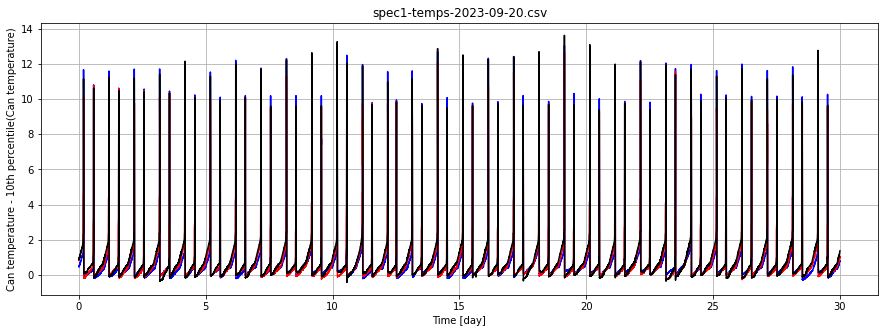

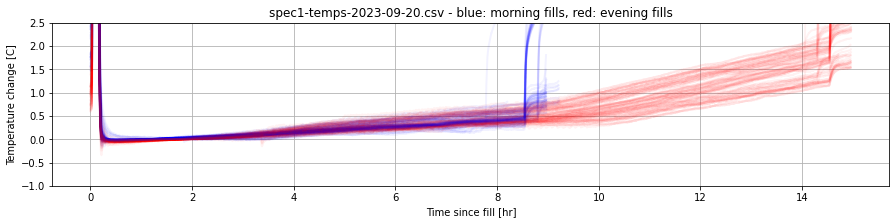

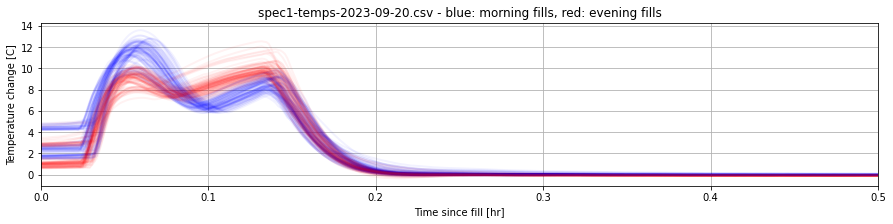

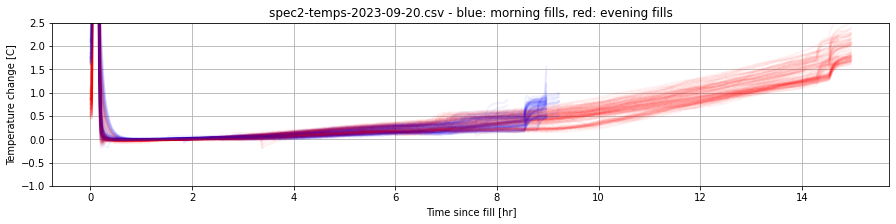

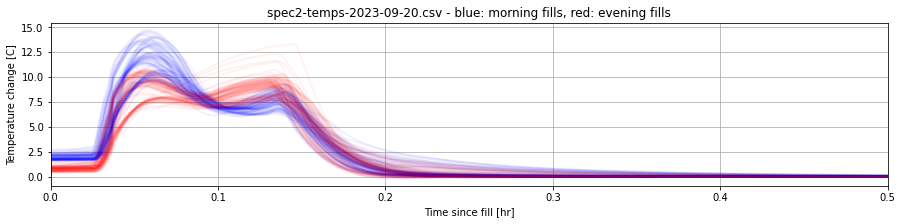

In [268]:


fname = "spec1-temps-2023-09-20.csv"

dat = np.loadtxt(fname, skiprows=2,delimiter=",")

msec,b,r,z = dat.T
hr = msec / 1e3 / 60 / 60
hr -= hr[0]

len(hr)
    
figure(0,figsize=(15,5))
plot(hr/24, b-np.quantile(b, .10), "b")
plot(hr/24, r-np.quantile(r, .10), "r")
plot(hr/24, z-np.quantile(z, .10), "k")
xlabel("Time [day]")
ylabel("Can temperature - 10th percentile(Can temperature)")
title(fname)
grid(True)

xs = hr[:]
x = hr[:-1]


ix = 0
for fname in ["spec1-temps-2023-09-20.csv", "spec2-temps-2023-09-20.csv"]:
    figure(1+ix,figsize=(15,3))
    figure(2+ix,figsize=(15,3))

    dat = np.loadtxt(fname, skiprows=2,delimiter=",")
    msec,b,r,z = dat.T
    hr = msec / 1e3 / 60 / 60
    hr -= hr[0]
    
    
    for ys in [b,r,z]:
        y = np.diff(ys)
        peaks = SS.find_peaks(y, height=.2, distance=10)[0]

        print(ix, ys[0:5])

        start = peaks[1]
        for peak in peaks[2:]:
            roi = slice(start-25, peak-50)
            N = roi.stop - roi.start
            if N<100: continue

            start = peak
            times = x[roi]
            times = times-times[0]


            yt = ys[roi]
            color = "r" if N>8000 else "b"
            figure(1+ix)
            plot(times, yt - np.quantile(yt, .1), color, alpha=0.05, lw=2)
            figure(2+ix)
            plot(times, yt - np.quantile(yt, .1), color, alpha=0.05, lw=2)


    for i in [1,2]:
        figure(i+ix)
        title("%s - blue: morning fills, red: evening fills" % fname)
        xlabel("Time since fill [hr]")
        ylabel("Temperature change [C]")
        grid(True)

    figure(1+ix)
    ylim(-1,2.5)

    figure(2+ix)
    xlim(0,0.5)
    ix += 2
